# 风险分析探索
## 项目介绍
>**探索性数据分析（Exploratory Data Analysis）**,是指对已有的数据（特别是跳查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。特别是当我们对这些数据中的信息没有足够的经验，不知道该用何种计方法进行分析时，探索性数据分析就会非常有效。探索性数据分析在上世纪六十年代被提出，其方法由美国著名统计学家约翰·图基(John Tukey)命名。

## 本项目需解决的问题
本项目分析P2P平台**Lending Club**的贷款数据，探索数据分析过程中，并尝试回答以下3个问题：
+ 利率与风险成正比，风险越高，利率越高，违约的可能线性越大，从P2P平台的数据来看，**影响风险的因素**有哪些？（为后续建模做准备）
+ 了解P2P平台的**业务特点、产品类型、资产质量、风险定价**？
+ 有什么**建议**？
## 分析思路
我们可以将信贷信息分为**信贷硬信息**和**信贷软信息**。
任何可以量化客户的还款能力的信息均可以用作硬信息，可勾勒客户还款意愿的信息则为软信息。
**信贷硬信息：** 站在企业的角度，硬信息主要包括财务三大报表（资产负债表、利润表和现金流量表）以及信贷记录；站在个人角度硬信息主要包括：个人年收入 、资产状况（借款是否拥有房产、车或理财产品）。
**信贷软信息：** 过往的信贷记录比较直接了解客户的还款意愿，以往发生违约次数较多的客户再次发生违约的概率相比其他客户大。客户的学历、年龄、目前工作所在单位的级别和性别等信息也可作为软信息。
因此，我们主要围绕着**“客户是否具有偿还能力，是否具有偿还意愿”**展开探索分析。
## 项目背景
>作为旧金山的一家个人对个人的借贷公司，Lending Club成立于2006年。他们是第一家注册为按照美国证券交易委员会SEC(Securities and Exchange Commission)的安全标准向个人提供个人贷款的借贷公司。与传统借贷机构最大的不同是，Lending Club利用网络技术打造的这个交易平台，直接连接了个人投资者和个人借贷者，通过此种方式，缩短了资金流通的环节，尤其是绕过了传统的大银行等金融机构，使得投资者和借贷者都能得到更多实惠、更快捷。对于投资者来说可以获得更好的回报，而对于借贷者来说，则可以获得相对较低的贷款利率。

### 数据集
数据集是Lending Club平台发生借贷的业务数据（2017年第二季），具体数据集可以从Lending Club官网下载

本项目报告分析，我将如何运用Python操作数据和探索分析数据的思考过程均记录下来。

## 前期准备
### 第一步，导入所需库

In [1]:
# Imports

# Pandas
import pandas as pd

# numpy,matplotlib,seaborn,pyecharts
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline#使用%matplotlib inline在绘图时，将图片内嵌在交互窗口，而不是弹出一个图片窗口
from pyecharts import Pie

#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore') 

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

## 获取数据
### 第二步，使用pandas解析数据

In [19]:
data = pd.read_csv('D:\python file\lending club\LoanStats_2017Q2.csv', encoding='latin-1',skiprows = 1)

## 探索数据分析（EDA）
首先预览基本内容，Pandas为我们提供很多可以方便查看和检查数数据的方法，有df.head(n)、df.tail(n)、df.shape()、df.info() 等 。

In [3]:
data.shape  # 该数据集有105,543行，137列

(105453, 145)

In [9]:
data.head()
#data.tail()
#data.info

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000.0,3000.0,3000.0,36 months,7.97%,93.97,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4200.0,4200.0,4200.0,36 months,10.91%,137.33,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


扩大行查看范围

In [8]:
data.iloc[0] #取矩阵当中第一行样本

id                                                           NaN
member_id                                                    NaN
loan_amnt                                                   7500
funded_amnt                                                 7500
funded_amnt_inv                                             7500
term                                                   36 months
int_rate                                                   7.35%
installment                                               232.79
grade                                                          A
sub_grade                                                     A4
emp_title                                     Associate Director
emp_length                                               7 years
home_ownership                                          MORTGAGE
annual_inc                                                110000
verification_status                                 Not Verified
issue_d                  

### 处理缺失值
统计每列属性缺失值的数量。

In [21]:
def not_null_count(column):
    column_null = pd.isnull(column)#判断某列属性是否存在缺失值
    null = column[column_null]
    return len(null)
column_null_count = data.apply(not_null_count)
print (column_null_count)
#print (column_null_count[column_null_count>50000])

id                                            105451
member_id                                     105453
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                       6784
emp_length                                         2
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [22]:
half_count = len(data)/2 # 设定阀值
data = data.dropna(thresh = half_count, axis = 1 ) #若某一列数据缺失的数量超过阀值就会被删除
#data = data.drop(['desc', 'url'], axis = 1) # 删除某些加载了网址的url 和 描述的列
data.to_csv('D:\python file\lending club\loans_2017q2.csv', index = False,encoding='utf-8') # 将预处理后的数据转化为csv

再次用pandas解析预处理过的数据文件并预览基本信息

In [23]:
loans = pd.read_csv('D:\python file\lending club\loans_2017q2.csv',encoding='utf-8')
loans.shape

(105453, 103)

In [24]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,Associate Director,7 years,...,8.3,0.0,0.0,350617.0,45955.0,83700.0,32239.0,N,Cash,N
1,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,NaN,n/a,...,100.0,0.0,0.0,7100.0,3911.0,3400.0,0.0,N,Cash,N
2,3000.0,3000.0,3000.0,36 months,7.97%,93.97,A,A5,Deputy probate register,3 years,...,33.3,0.0,0.0,56396.0,45876.0,8500.0,45296.0,N,Cash,N
3,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,Project Lead,10+ years,...,0.0,0.0,0.0,417686.0,90921.0,35000.0,92511.0,N,Cash,N
4,4200.0,4200.0,4200.0,36 months,10.91%,137.33,B,B4,STORE MANAGER,8 years,...,33.3,0.0,2.0,151300.0,167462.0,4300.0,136800.0,N,Cash,N


数据从137列减少至102列

In [25]:
loans.dtypes  # 查看数据类型 

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec     

In [26]:
loans.describe() 

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,105451.000000,105451.000000,105451.000000,105451.000000,1.054510e+05,105376.000000,105451.000000,105451.000000,54332.00000,105451.000000,...,105451.000000,105451.000000,105451.000000,104305.000000,105451.000000,105451.000000,1.054510e+05,1.054510e+05,105451.000000,1.054510e+05
mean,14589.070516,14589.070516,14585.195731,436.796162,8.045197e+04,18.987276,0.356052,0.509507,33.28613,11.849655,...,0.093380,2.073257,93.482781,40.556624,0.141089,0.075163,1.850722e+05,5.296400e+04,23659.481589,4.644022e+04
std,9478.834204,9478.834204,9476.119506,280.181678,6.822064e+04,14.145490,0.962047,0.809095,21.91821,5.776871,...,0.557542,1.838137,9.748996,36.008256,0.391480,0.441561,1.847481e+05,5.140751e+04,23191.726471,4.615661e+04
min,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,7000.000000,7000.000000,7000.000000,232.640000,4.800000e+04,12.230000,0.000000,0.000000,15.00000,8.000000,...,0.000000,1.000000,90.400000,0.000000,0.000000,0.000000,5.294800e+04,2.160150e+04,8500.000000,1.683250e+04
50%,12000.000000,12000.000000,12000.000000,361.380000,6.800000e+04,18.120000,0.000000,0.000000,30.00000,11.000000,...,0.000000,2.000000,97.400000,33.300000,0.000000,0.000000,1.197400e+05,3.898700e+04,16800.000000,3.500000e+04
75%,20000.000000,20000.000000,20000.000000,584.370000,9.700000e+04,24.580000,0.000000,1.000000,49.00000,15.000000,...,0.000000,3.000000,100.000000,66.700000,0.000000,0.000000,2.680685e+05,6.681950e+04,30900.000000,6.209950e+04
max,40000.000000,40000.000000,40000.000000,1719.830000,8.900000e+06,999.000000,42.000000,5.000000,161.00000,88.000000,...,42.000000,22.000000,100.000000,100.000000,7.000000,22.000000,4.460960e+06,1.310848e+06,407900.000000,1.349413e+06


Pandas的describe()不能统计数据类型为object的属性，部分数据int_rate和emp_length数据类型都是object，稍后分析数据时需将它们转化为类型为floate的数字类型。

数据集的属性较多，我们初步聚焦几个重要特征展开分析，特别是我们最关心的属性贷款状态。

In [27]:
used_col = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status','purpose', 'annual_inc', 'emp_length'] # 贷款金额、贷款期限、贷款利率、信用评级、业务发生时间、业务发生所在州、贷款状态、贷款用途
used_data = loans[used_col]

In [28]:
used_data.head(5)  # 数据预览

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
0,7500.0,36 months,7.35%,A,Jun-2017,TX,Fully Paid,debt_consolidation,110000.0,7 years
1,2300.0,36 months,12.62%,C,Jun-2017,NY,Current,credit_card,10000.0,n/a
2,3000.0,36 months,7.97%,A,Jun-2017,MI,Current,debt_consolidation,34000.0,3 years
3,7500.0,36 months,7.35%,A,Jun-2017,MD,Current,debt_consolidation,113000.0,10+ years
4,4200.0,36 months,10.91%,B,Jun-2017,IL,Current,other,35000.0,8 years


In [29]:
def not_null_count(column):
    column_null = pd.isnull(column)  #判断某列属性是否存在缺失值
    null = column[column_null]
    return len(null)
column_null_count = used_data.apply(not_null_count)  
print (column_null_count)

loan_amnt      2
term           2
int_rate       2
grade          2
issue_d        2
addr_state     2
loan_status    2
purpose        2
annual_inc     2
emp_length     2
dtype: int64


### 单变量分析
+ ###  1.贷款状态分布

### 处理异常值

In [39]:
used_data[pd.isnull(used_data.loan_status) == True]

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
105451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
used_data['loan_status'].value_counts()

Current               95504
Fully Paid             6430
Late (31-120 days)     1395
In Grace Period        1305
Late (16-30 days)       610
Charged Off             200
Default                   7
Name: loan_status, dtype: int64

In [50]:
used_data[(used_data['loan_status'] == 'Default')| (pd.isnull(used_data['loan_status']) == True)]

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
36349,18000.0,36 months,19.03%,D,Jun-2017,FL,Default,car,97500.0,10+ years
36445,12000.0,60 months,10.42%,B,Jun-2017,NY,Default,credit_card,65000.0,4 years
36541,10800.0,60 months,16.02%,C,Jun-2017,CA,Default,home_improvement,69500.0,5 years
72760,35000.0,60 months,22.74%,E,May-2017,NC,Default,credit_card,100000.0,10+ years
73845,2000.0,36 months,12.74%,C,May-2017,CA,Default,home_improvement,15000.0,2 years
74132,4000.0,36 months,12.74%,C,May-2017,CA,Default,credit_card,90000.0,2 years
74229,21150.0,60 months,28.69%,F,May-2017,RI,Default,car,70000.0,10+ years
105451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


由于loan_status异常值为NaN的数据均缺失，因此我们直接删异常值所对应的行。

In [51]:
used_data = used_data.drop([105451,105452]) 

为了更方便分析，我们将贷款状态进行分类变量编码，主要将贷款状态分为正常和违约。

In [54]:
#使用Pandas replace函数定义新函数：

def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:

pd.value_counts(used_data["loan_status"])

used_data["Loan_Status_Coded"] = coding(used_data["loan_status"], {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1,'Default':1})

print( '\nAfter Coding:')

pd.value_counts(used_data["Loan_Status_Coded"])


After Coding:


0    101934
1      3517
Name: Loan_Status_Coded, dtype: int64

In [55]:
[i for i in pd.value_counts(used_data['Loan_Status_Coded'])]  # Pyecharts 目前支持Numpy和Pandas的数据类型，因此需做数据类型转换

[101934, 3517]

In [56]:
# 用新学的Pyecharts作图

attr = ["正常", "违约"]
pie = Pie("贷款状态占比")
pie.add("", attr, [int(i) for i in pd.value_counts(used_data["Loan_Status_Coded"])] ,is_label_show=True)
pie

从图中可以看出，平台贷款发生违约的数量占少数。贷款状态为正常的有103,746个，贷款正常状态占比为98.38%。贷款状态将作为我们建模的标签，贷款状态正常和贷款状态违约两者数量不平衡，绝大多数常见的机器学习算法对于不平衡数据集都不能很好地工作，下一篇项目报告中，我们将会解决样本不平衡的问题。

+ ###  2.贷款金额分布

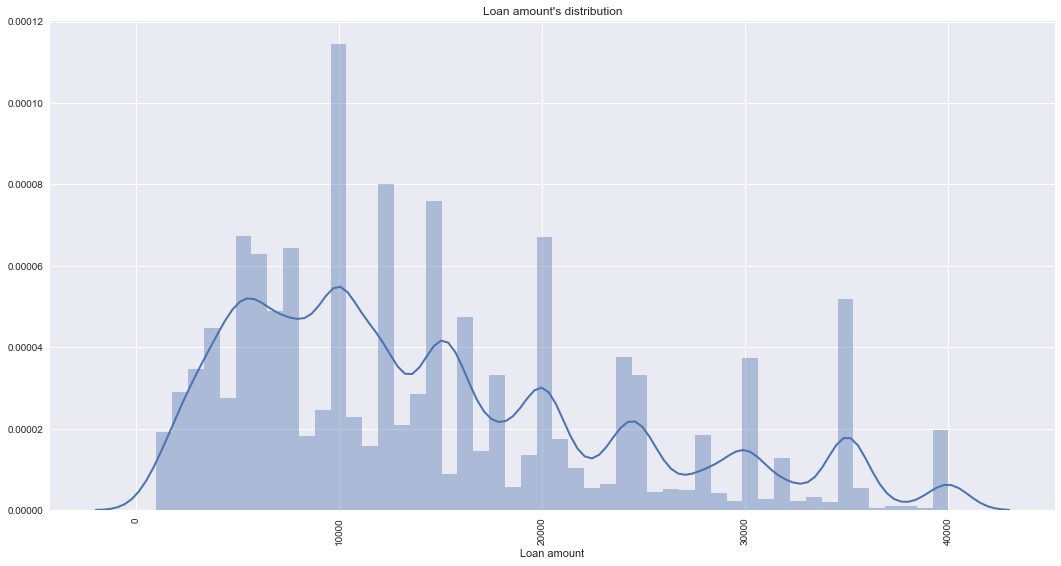

In [57]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(used_data['loan_amnt'] )
plt.xticks(rotation=90)
plt.xlabel('Loan amount')
plt.title('Loan amount\'s distribution')
sdisplot_loan.figure.savefig("Loan_amount")

In [58]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
